<a href="https://colab.research.google.com/github/myungjinma/acorn_python/blob/main/0816_68%EC%9D%BC%EC%B0%A8_ML(SVM%2C_Kernel%2C_Scaler%2C3_Classes%2C_Recipes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 20.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=8b0aaef992f3bf3aa3c118723207de6ba3ec371f24b49227fd6bc6f221a5db01
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


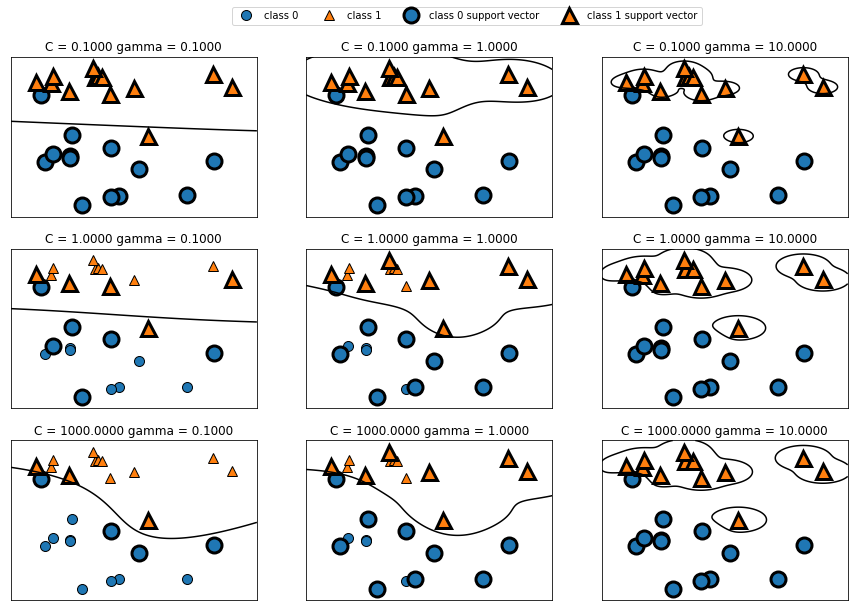

In [3]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots (3, 3, figsize = (15,10))

for ax , C in zip(axes, [-1, 0, 3]):
  for a , gamma in zip(ax, range(-1, 2)):
    mglearn.plots.plot_svm(log_C = C , log_gamma = gamma, ax= a)


axes[0, 0].legend(['class 0', 'class 1', 'class 0 support vector', 'class 1 support vector'],
                  ncol = 4, loc = [.9, 1.2])

#커널함수의 특성

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl

In [5]:
import pandas as ps
import numpy as np


In [6]:
from sklearn.svm import SVC

In [7]:
iris = load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3 , random_state=0)

In [11]:
sc =StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='^', label='0', s=100)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[y == 2, 0], X[y == 2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("patal length")
    plt.ylabel("patal width")
    plt.title(title)

In [16]:
model1 = SVC(kernel = 'linear').fit(X_test_std, y_test)
model2 = SVC(kernel = 'poly', random_state=0,
             gamma=10, C =1.0).fit(X_test_std, y_test)
model3 = SVC(kernel = 'rbf', random_state=0, gamma=1,
             C = 1.0).fit(X_test_std, y_test)

<function matplotlib.pyplot.show(*args, **kw)>

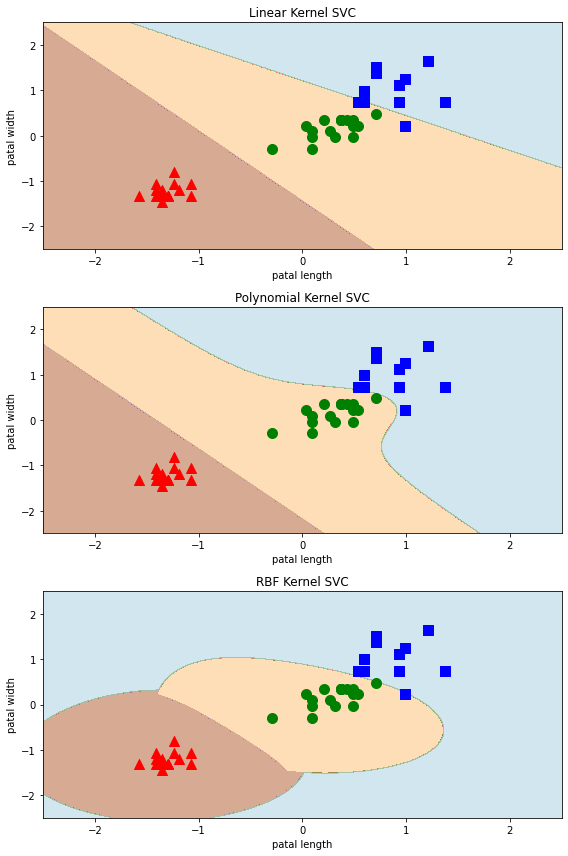

In [18]:
plt.figure(figsize=(8,12))
plt.subplot(311)
plot_iris(X_test_std, y_test, model1, "Linear Kernel SVC")
plt.subplot(312)
plot_iris(X_test_std, y_test, model2, "Polynomial Kernel SVC")
plt.subplot(313)
plot_iris(X_test_std, y_test, model3, "RBF Kernel SVC")
plt.tight_layout()
plt.show

#스케일 변환의 영향

In [21]:
Xs = np.array([[1, 50],[5,20],[3,80],[5,60]]).astype(np.float64)
ys = np.array([0,0,1,1])

In [22]:
Xs

array([[ 1., 50.],
       [ 5., 20.],
       [ 3., 80.],
       [ 5., 60.]])

In [23]:
ys

array([0, 0, 1, 1])

(0.0, 6.0, 0.0, 90.0)

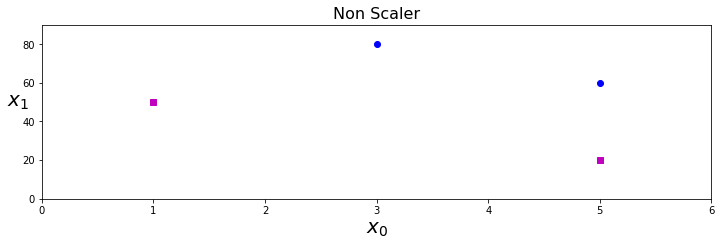

In [24]:
plt.figure(figsize=(12, 3.2))
plt.subplot(111)
plt.plot(Xs[:, 0][ys ==1], Xs[:,1][ys ==1],'bo')
plt.plot(Xs[:, 0][ys ==0], Xs[:,1][ys ==0],'ms')

plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20, rotation=0)
plt.title('Non Scaler', fontsize=16)
plt.axis([0, 6,0,90])

In [25]:
Xs[:, 0][ys==1]

array([3., 5.])

In [26]:
svm_clf = SVC(kernel='linear', C=100)
svm_clf.fit(Xs, ys)

SVC(C=100, kernel='linear')

$$y_i(\vec{w} ⋅ \vec{x_i} + b)-1 = 0 ..(1)$$

$$w_0x_0 + w_1x_1 + b -1 = 0$$

$$w_1x_1 = -w_0x_0 - b +1$$

$$x_1 = -{w_0 \over {w_1}} x_0 -{1 \over w_1}  b +{1  \over w_1} $$

$$y = ax + intercept + margin$$

In [32]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
  w = svm_clf.coef_[0]  #w = (w0, w1)
  b = svm_clf.intercept_[0]
  margin = 1/w[1]
  x0 = np.linspace(xmin, xmax, 200)

  decision_boundary = -w[0]/w[1] * x0 - b/w[1]
  gutter_up = decision_boundary + margin
  gutter_down = decision_boundary - margin

  svs = svm_clf.support_vectors_

  

  plt.scatter(svs[:,0], svs[:, 1], s=180, facecolors = "#FFAAAA")
  plt.plot(x0, decision_boundary, 'k-', linewidth=2)
  plt.plot(x0, gutter_up, 'k--', linewidth=2)
  plt.plot(x0, gutter_down, 'k--', linewidth=2)

(0.0, 6.0, 0.0, 90.0)

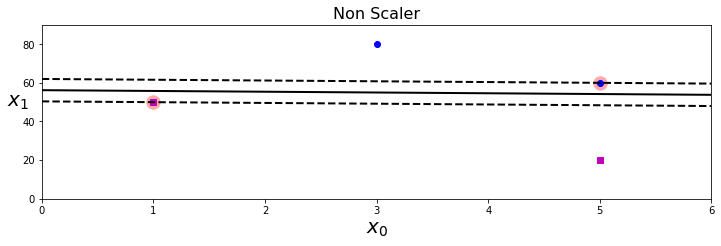

In [33]:
plt.figure(figsize=(12, 3.2))
plt.subplot(111)
plt.plot(Xs[:, 0][ys ==1], Xs[:,1][ys ==1],'bo')
plt.plot(Xs[:, 0][ys ==0], Xs[:,1][ys ==0],'ms')
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20, rotation=0)
plt.title('Non Scaler', fontsize=16)
plt.axis([0, 6,0,90])

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)

In [35]:
X_scaled

array([[-1.50755672, -0.11547005],
       [ 0.90453403, -1.5011107 ],
       [-0.30151134,  1.27017059],
       [ 0.90453403,  0.34641016]])

In [36]:
Xs

array([[ 1., 50.],
       [ 5., 20.],
       [ 3., 80.],
       [ 5., 60.]])

In [37]:
svm_clf.fit(X_scaled, ys)

SVC(C=100, kernel='linear')

In [38]:
svm_clf = SVC(kernel = 'linear', C =100)
svm_clf.fit(X_scaled, ys)

SVC(C=100, kernel='linear')

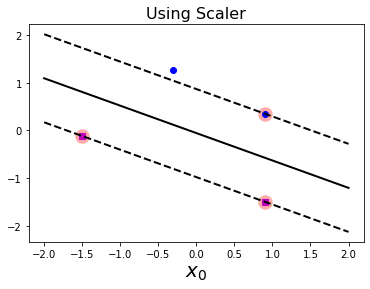

In [39]:
plt.subplot(111)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], 'bo')
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], 'ms')
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title('Using Scaler', fontsize=16)
plt.show()

#Class가 3개인 경우

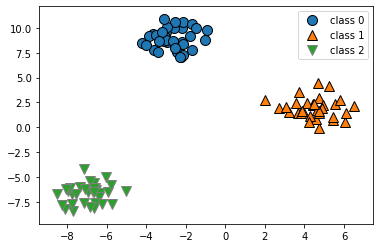

In [40]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['class 0', 'class 1', 'class 2'])

In [41]:
from sklearn.svm import LinearSVC

In [44]:
l_svm = LinearSVC().fit(X,y)

In [45]:
l_svm.coef_

array([[-0.17492429,  0.23140624],
       [ 0.47621502, -0.0693655 ],
       [-0.18914219, -0.20399748]])

In [46]:
l_svm.intercept_

array([-1.07745012,  0.13140625, -0.08604836])

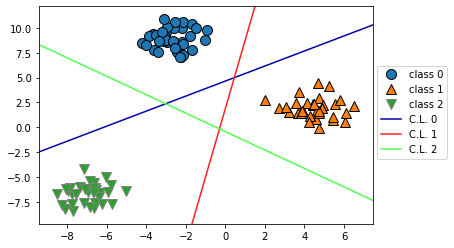

In [47]:
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
line = np.linspace(-10, 10)
for coef, intercept, color in zip(l_svm.coef_, l_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.legend(['class 0', 'class 1', 'class 2', 'C.L. 0','C.L. 1', 'C.L. 2'], loc=(1.01, 0.3))


#muffin recipes

In [48]:
!cp drive/MyDrive/recipes_muffins_cupcakes.csv .

In [49]:
!ls

cache  drive  recipes_muffins_cupcakes.csv  sample_data


In [51]:
import pandas as pd

In [52]:
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [55]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm
# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
# Allows charts to appear in the notebook
%matplotlib inline
# Pickle package
import pickle

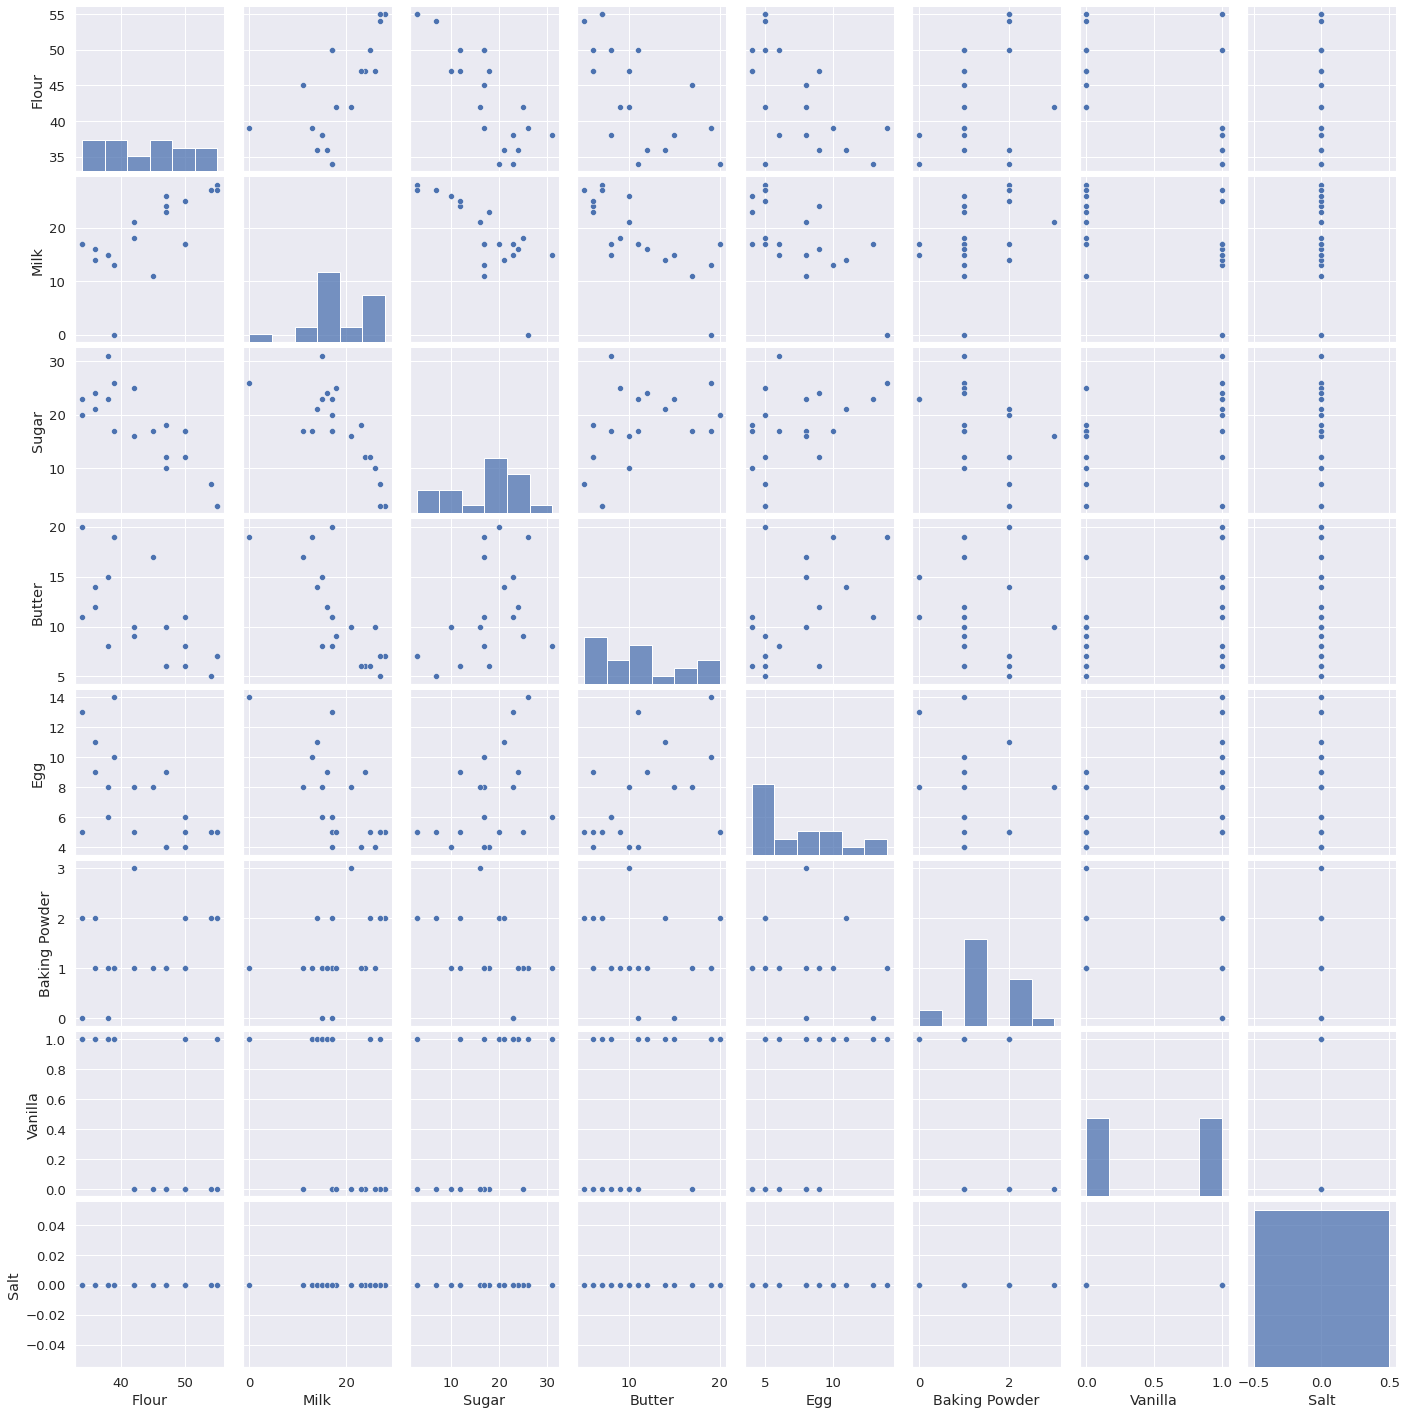

In [57]:
sns.pairplot(recipes)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


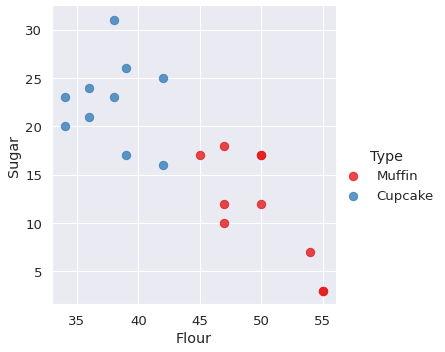

In [58]:
# Plot two ingredients (Flour and Sugar)
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [59]:
#SVM  - Support Vector Machine
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
X_test = recipes[['Flour','Sugar']].to_numpy()
#print(X_test)
y_test = np.where(recipes['Type']=='Muffin', 0, 1)
#print(y_test)
# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [60]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(X_test, y_test)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,   decision_function_shape=None, 
    degree=3, gamma='auto', kernel='linear',   max_iter=-1, probability=False, 
    random_state=None, shrinking=True,   tol=0.001, verbose=False)

SVC(decision_function_shape=None, gamma='auto', kernel='linear')

In [63]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


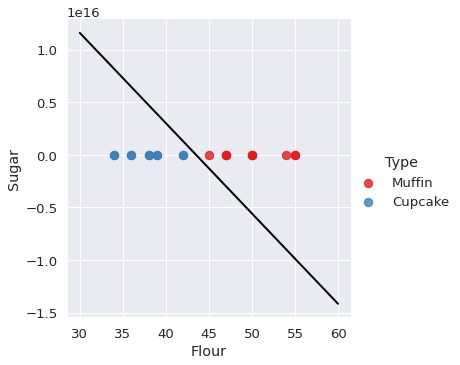

In [64]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')

In [65]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour ,sugar):
  if(model.predict([[flour, sugar]]))==0:
    print('You\'re looking at a muffin recipe!')
  else:
    print('You\'re looking at a cupcake recipe!')

In [66]:
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


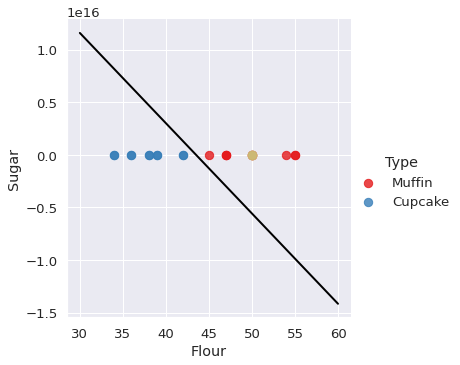

In [68]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');